| **Inicio** | **atrás 9** | **Siguiente 11** |
|----------- |-------------- |---------------|
| [🏠](../../README.md) | [⏪](./9.Tendencia_Central.ipynb)| [⏩](./11.Histogramas.ipynb)|

# **10. Datos Anómalos (outliers) y Diagramas de Caja (BoxPlots) con la Prueba de Tukey en Python**

## **Qué son los datos anómalos**

Los datos anómalos (también conocidos como valores atípicos o outliers en inglés) son puntos o valores que se alejan significativamente del patrón general de un conjunto de datos. Estos valores pueden ser resultado de errores de medición, errores de registro, o incluso ser datos genuinos pero extremadamente raros o inusuales. Los datos anómalos pueden afectar negativamente a la interpretación y análisis de los datos, por lo que es importante identificarlos y manejarlos adecuadamente.

## **Creación de diagramas de caja**

La creación de diagramas de caja es una forma visual de representar la distribución de un conjunto de datos, mostrando la mediana, los cuartiles y los valores atípicos. En un diagrama de caja, una caja rectangular representa el rango intercuartílico (IQR), que se extiende desde el primer cuartil (Q1) hasta el tercer cuartil (Q3). La línea dentro de la caja representa la mediana. Los valores atípicos se muestran como puntos más allá de los extremos de los bigotes, que se extienden desde la caja hasta los valores más alejados que no se consideran atípicos.

Aquí hay un ejemplo de código en Python que utiliza la biblioteca Seaborn para crear un diagrama de caja de un conjunto de datos aleatorio:

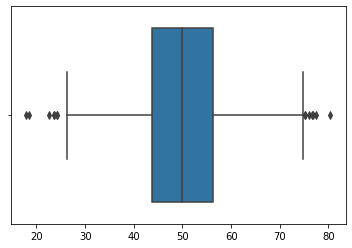

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Generar datos aleatorios
datos = np.random.normal(loc=50, scale=10, size=1000)

# Crear un diagrama de caja con Seaborn
sns.boxplot(x=datos)

# Mostrar la gráfica
plt.show()

Este código generará un diagrama de caja con los datos aleatorios generados. La caja representa el rango intercuartílico, la línea en el centro de la caja representa la mediana y los puntos fuera de los bigotes representan valores atípicos. 

## **Boxplot mostrando datos anómalos**

El boxplot es una herramienta visual muy útil para representar gráficamente la distribución y los valores atípicos de un conjunto de datos. En un boxplot, el diagrama se divide en cuartiles, siendo la línea central la mediana. El rango intercuartílico (IQR) es la distancia entre el primer cuartil (Q1) y el tercer cuartil (Q3). Cualquier valor que esté a una distancia mayor que 1,5 veces el IQR desde el borde del cuartil se considera un valor atípico y se muestra como un punto individual.

Aquí hay un ejemplo de código que muestra cómo crear un boxplot con datos anómalos utilizando la biblioteca Seaborn en Python:

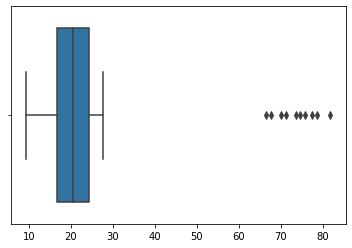

In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Generar datos aleatorios con valores anómalos
datos = np.concatenate([np.random.normal(20, 5, 100), np.random.normal(70, 5, 10)])

# Crear el boxplot
sns.boxplot(x=datos)

# Mostrar la gráfica
plt.show()

En este ejemplo, generamos un conjunto de datos con 100 valores aleatorios de una distribución normal con una media de 20 y una desviación estándar de 5, y luego agregamos 10 valores anómalos generados aleatoriamente de una distribución normal con una media de 70 y una desviación estándar de 5. Luego creamos el boxplot utilizando Seaborn y mostramos la gráfica. El resultado es un diagrama de caja con los cuartiles, la mediana y los valores atípicos resaltados en puntos individuales.

## **Regla empírica 68-95-99.7**

La regla empírica, también conocida como la regla de los tres sigmas, establece que en una distribución de datos con forma de campana (distribución normal), aproximadamente el 68% de los datos se encuentran dentro de una desviación estándar de la media, el 95% de los datos se encuentran dentro de dos desviaciones estándar de la media y el 99.7% de los datos se encuentran dentro de tres desviaciones estándar de la media.

A continuación, se muestra un ejemplo de código en Python para visualizar la regla empírica utilizando una distribución normal generada aleatoriamente:

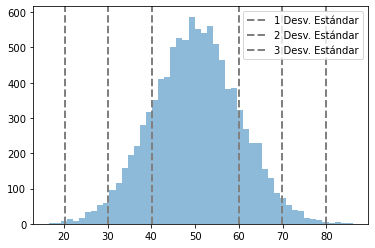

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Generar datos aleatorios con distribución normal
datos = np.random.normal(loc=50, scale=10, size=10000)

# Calcular la media y desviación estándar
media = np.mean(datos)
std_dev = np.std(datos)

# Calcular los límites de la regla empírica
limite1 = media - std_dev
limite2 = media + std_dev
limite3 = media + 2*std_dev
limite4 = media - 2*std_dev
limite5 = media + 3*std_dev
limite6 = media - 3*std_dev

# Graficar los datos y los límites
plt.hist(datos, bins=50, alpha=0.5)
plt.axvline(limite1, color='gray', linestyle='dashed', linewidth=2)
plt.axvline(limite2, color='gray', linestyle='dashed', linewidth=2)
plt.axvline(limite3, color='gray', linestyle='dashed', linewidth=2)
plt.axvline(limite4, color='gray', linestyle='dashed', linewidth=2)
plt.axvline(limite5, color='gray', linestyle='dashed', linewidth=2)
plt.axvline(limite6, color='gray', linestyle='dashed', linewidth=2)

# Agregar leyendas
plt.legend(['1 Desv. Estándar', '2 Desv. Estándar', '3 Desv. Estándar'])

# Mostrar la gráfica
plt.show()

## **Prueba de Tukey para detectar datos anómalos**

La prueba de Tukey, también conocida como el rango intercuartil (IQR), es una técnica estadística utilizada para detectar valores atípicos en un conjunto de datos. Esta prueba compara la distancia entre el primer cuartil (Q1) y el tercer cuartil (Q3) con la longitud de los bigotes en un diagrama de caja. Si algún punto de datos cae por fuera de estos bigotes, se considera como un valor atípico.

Aquí hay un ejemplo de cómo realizar la prueba de Tukey en Python:

No se encontraron valores anómalos.


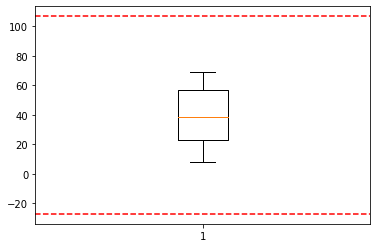

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import iqr

# Generar datos aleatorios
datos = np.concatenate([np.random.normal(loc=20, scale=5, size=100),
                        np.random.normal(loc=40, scale=5, size=100),
                        np.random.normal(loc=60, scale=5, size=100)])

# Calcular los cuartiles y el IQR
q1 = np.percentile(datos, 25)
q3 = np.percentile(datos, 75)
iqr = iqr(datos)

# Calcular los límites para detectar valores atípicos
lim_inf = q1 - 1.5 * iqr
lim_sup = q3 + 1.5 * iqr

# Encontrar valores atípicos
outliers = datos[(datos < lim_inf) | (datos > lim_sup)]

# Graficar el diagrama de caja
plt.boxplot(datos)

# Agregar una línea roja para mostrar los límites de los bigotes
plt.axhline(y=lim_inf, color='red', linestyle='dashed')
plt.axhline(y=lim_sup, color='red', linestyle='dashed')

# Mostrar los valores atípicos
if len(outliers) > 0:
    print("Los siguientes valores son anómalos: ")
    print(outliers)
else:
    print("No se encontraron valores anómalos.")

# Mostrar la gráfica
plt.show()

En este ejemplo, se generan datos aleatorios de tres distribuciones normales diferentes y se combinan en un conjunto de datos más grande. Luego se calculan los cuartiles y el rango intercuartil (IQR) del conjunto de datos completo. Se utilizan los límites inferior y superior para determinar si hay valores atípicos en el conjunto de datos. Si algún punto de datos cae por fuera de estos límites, se considera como un valor atípico. En este caso, se muestra una línea roja en el diagrama de caja para mostrar los límites de los bigotes y se imprimen los valores atípicos. Si no se encuentra ningún valor atípico, se muestra un mensaje indicando que no se encontraron valores atípicos.

| **Inicio** | **atrás 9** | **Siguiente 11** |
|----------- |-------------- |---------------|
| [🏠](../../README.md) | [⏪](./9.Tendencia_Central.ipynb)| [⏩](./11.Histogramas.ipynb)|